In [39]:
import img_pipe
import plot_recon_anatomy
import ctmr_brain_plot
import scipy.io
import numpy as np
from matplotlib import cm
import FS_colorLUT

In [40]:
subj = 'EC105'
subj_dir = '/Applications/freesurfer/subjects'
hem = 'rh'

# Initialize patient
patient = img_pipe.freeCoG(subj = subj, subj_dir= subj_dir, hem = hem)

In [41]:
# Plot electrodes on the brain, according to their automatically assigned anatomical label

%gui wx
mesh, mlab = plot_recon_anatomy.plot_recon_anatomy(patient)

[]
ctx-rh-caudalmiddlefrontal
ctx-rh-entorhinal
ctx-rh-fusiform
ctx-rh-inferiorparietal
ctx-rh-inferiortemporal
ctx-rh-lateralorbitofrontal
ctx-rh-medialorbitofrontal
ctx-rh-middletemporal
ctx-rh-parahippocampal
ctx-rh-parsopercularis
ctx-rh-parsorbitalis
ctx-rh-parstriangularis
ctx-rh-postcentral
ctx-rh-precentral
ctx-rh-rostralmiddlefrontal
ctx-rh-superiortemporal
ctx-rh-supramarginal
ctx-rh-temporalpole


In [37]:
# Change views to be from the left or right side
if hem=='lh':
    mlab.view(azimuth=0, elevation=-90, distance=200, focalpoint=None, roll=None, reset_roll=True, figure=None)
else:
    mlab.view(azimuth=0, elevation=90, distance=200, focalpoint=None, roll=None, reset_roll=True, figure=None)

mlab.savefig('%s_anatomy.png'%subj, size=(1200,900), magnification='auto')

mlab.view(azimuth=90, elevation=180, distance=250, focalpoint=None, roll=-90, reset_roll=True, figure=None)
mlab.savefig('%s_anatomy_bottom.png'%subj, size=(1200,900), magnification='auto')

setting roll


In [44]:
# Set brain opacity so depth electrodes are visible
mesh.actor.property.opacity = 1.0


In [45]:
# Now load the electrodes and pial surfaces to do more clever things with ctmr_brain_plot
a = scipy.io.loadmat('/Applications/freesurfer/subjects/EC105/Meshes/rh_pial_trivert.mat')
e = scipy.io.loadmat('/Applications/freesurfer/subjects/EC105/elecs/TDT_elecs_all.mat')

In [46]:
mlab.clf()

In [69]:
mesh = ctmr_brain_plot.ctmr_gauss_plot(a['tri'], a['vert'], color=(0.8, 0.8, 0.8))
# Add the electrodes, colored by anatomical region
elec_colors = np.zeros((e['elecmatrix'].shape[0], e['elecmatrix'].shape[1]))
# Import freesurfer color lookup table as a dictionary
cmap = FS_colorLUT.get_lut()
brain_areas = np.unique(e['anatomy'][:,3])
for b in brain_areas:
    #print b[0][0:5]
    if b[0][0:3]!='ctx' and b[0][0:4] != 'Left' and b[0][0:5] != 'Right' and b[0][0:5] != 'Brain' and b[0] != 'Unknown':
        #print b
        this_label = 'ctx-%s-%s'%(hem, b[0])
        print(this_label)
    if this_label != '':
        el_color = np.array(cmap[this_label])/255.
        ctmr_brain_plot.el_add(e['elecmatrix'][e['anatomy'][:,3]==b,:], color=tuple(el_color))

[]
ctx-rh-caudalmiddlefrontal
ctx-rh-entorhinal
ctx-rh-fusiform
ctx-rh-inferiorparietal
ctx-rh-inferiortemporal
ctx-rh-lateralorbitofrontal
ctx-rh-medialorbitofrontal
ctx-rh-middletemporal
ctx-rh-parahippocampal
ctx-rh-parsopercularis
ctx-rh-parsorbitalis
ctx-rh-parstriangularis
ctx-rh-postcentral
ctx-rh-precentral
ctx-rh-rostralmiddlefrontal
ctx-rh-superiortemporal
ctx-rh-supramarginal
ctx-rh-temporalpole


In [46]:
pts, mlab = ctmr_brain_plot.el_add(e['elecmatrix'])
mlab.view(azimuth=0, elevation=90, distance=200, focalpoint=None, roll=None, reset_roll=True, figure=None)
#mlab.savefig('test.eps', size=(1200,900), magnification='auto')

mesh, mlab = ctmr_brain_plot.ctmr_gauss_plot(a['tri'],a['vert'],
                                elecs=e['elecmatrix'],
                                weights=np.ones((e['elecmatrix'].shape[0],1)),
                                cmap='viridis')
mlab.view(azimuth=0, elevation=90, distance=200, focalpoint=None, roll=None, reset_roll=True, figure=None)

#mlab.savefig('test.tiff', size=(1200,900), magnification='auto')

[  1.23338790e-191   5.10748254e-193   4.68315563e-195 ...,
   7.37223133e-010   1.39639607e-007   1.62480038e-010]


(0.0, 90.0, 200, array([ 33.27361038,   1.20117569,  29.95195961]))

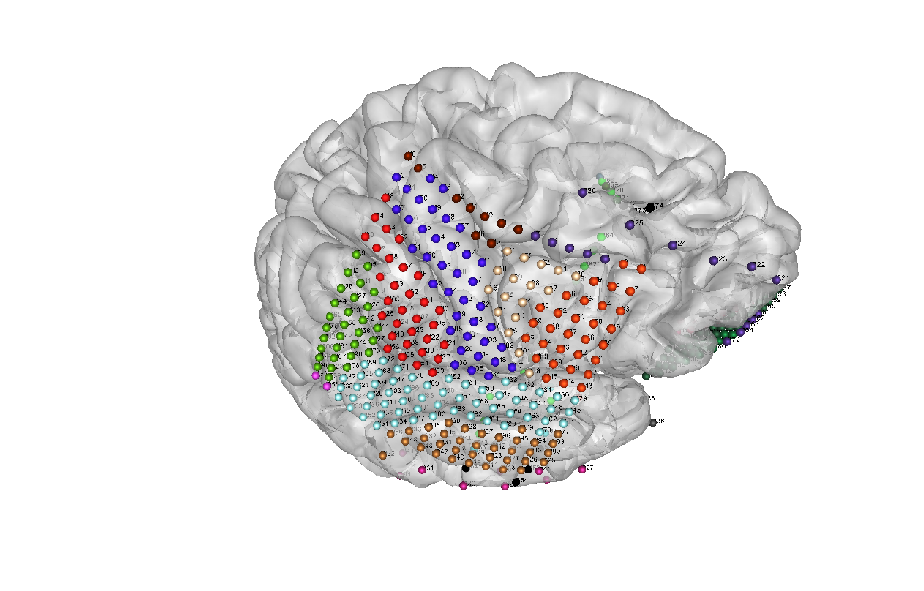

In [43]:
arr = mlab.screenshot(antialiased=True)

%matplotlib inline
import pylab as pl
pl.figure(figsize=(20,10))
pl.imshow(arr, aspect='equal')
pl.axis('off')
pl.show()